# Survival Curve for Time to Clinical Stability (TCS)

### 1) Load cleaned dataset

In [1]:
import pandas as pd

df = pd.read_csv("capo_tcs_data_cleaned.csv")

### 2) Install & import necessary libraries

In [2]:
!pip install lifelines

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

### 3) Define time & event 
##### time: T = TCS (1-8)
##### event: E = 1 if the patient reached stability by day 7 (TCS <= 7)
##### E = 0 if TCS = 8 (not stable by day 7)

In [15]:
T = df["TCS"]
E = (df["TCS"] <= 7).astype(int)

### 4) Fit Kaplan-Meier model

In [31]:
kmf = KaplanMeierFitter()
kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 8230 total observations, 2844 right-censored observations>

### 5) Save .png image of survival curve

In [33]:
plt.figure()
plt.savefig("survival_curve_tcs.png")

<Figure size 640x480 with 0 Axes>

### 6) Plot the survival curve

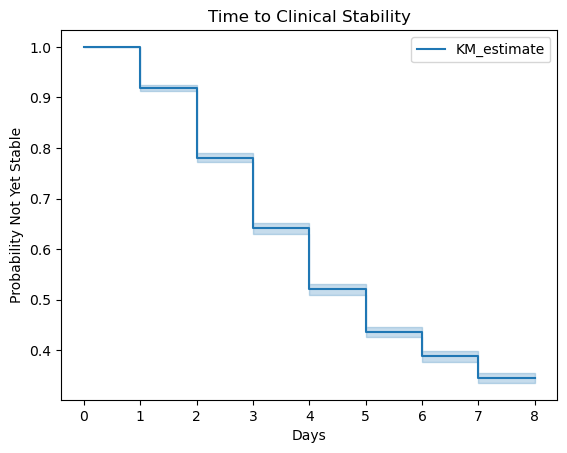

In [37]:
plt.figure()

kmf.survival_function_
kmf.plot_survival_function()

plt.title("Time to Clinical Stability")
plt.xlabel("Days")
plt.ylabel("Probability Not Yet Stable")

plt.savefig("tcs_survival_curve.png")
plt.show()

### 7) Table: % stable by day

In [21]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.918712
2.0,0.780802
3.0,0.640948
4.0,0.520656
5.0,0.436209
6.0,0.387971
7.0,0.345565
8.0,0.345565


### References:
##### https://hollyemblem.medium.com/kaplan-meier-survival-analysis-in-python-bab1e2f26497
##### Used as a basis for the code to make Kaplan-Meier survival curve